In [1]:
import matplotlib.pyplot as plt

from superfv import EulerSolver, plot_1d_slice
from superfv.initial_conditions import interacting_blast_wave_1d

In [2]:
N = 480
T = 0.038

configs = {
    "ref": dict(
        riemann_solver="hllc",
        flux_recipe=2,
        p=1,
        MUSCL=True,
        MUSCL_limiter="moncen",
        SED=True,
    ),
    "MUSCL-Hancock": dict(
        riemann_solver="hllc",
        flux_recipe=2,
        p=1,
        MUSCL=True,
        MUSCL_limiter="moncen",
        SED=True,
    ),
    "ZS3": dict(
        riemann_solver="hllc",
        flux_recipe=2,
        lazy_primitives=True,
        p=3,
        ZS=True,
        adaptive_dt=True,
        PAD={"rho": (0, None)},
        SED=True,
    ),
}

sims = {}
for name, config in configs.items():
    print(f"Running {name}...")
    sim = EulerSolver(
        ic=interacting_blast_wave_1d,
        bcx="reflective",
        nx=1000 if name == "ref" else N,
        **config,
    )

    try:
        if config.get("MUSCL", False):
            sim.musclhancock(T)
        elif "RK4" in name:
            sim.rk4(T)
        else:
            sim.run(T, q_max=2)
    except Exception as e:
        print(f"Failed: {e}")
        continue

    sims[name] = sim

Running ref...
Step #1997 @ t=3.80e-02 | dt=1.78e-05 | min(rho)=1.46e-01, min(P)=1.92e+01 | (done)                 
Running MUSCL-Hancock...
Step #952 @ t=3.80e-02 | dt=4.78e-05 | min(rho)=1.48e-01, min(P)=1.90e+01 | (done)                  
Running ZS3...
Step #954 @ t=3.80e-02 | dt=4.08e-05 | min(rho)=1.46e-01, min(P)=1.91e+01 | (done)                  


(0.5, 0.9)

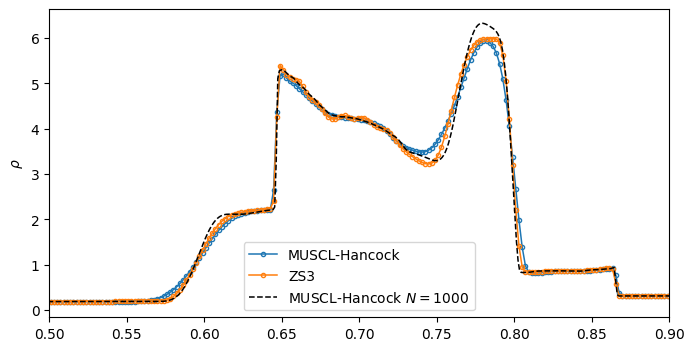

In [3]:
fig, ax = plt.subplots(1, figsize=(8, 4))

ax.set_ylabel(r"$\rho$")


style = dict(linewidth=1.1, markersize=3)

for name, sim in sims.items():
    if name == "ref":
        continue
    plot_1d_slice(
        sim,
        ax,
        "rho",
        label=name,
        marker="o",
        mfc="none",
        **style,
    )

if "ref" in sims:
    simMH = sims["ref"]
    plot_1d_slice(
        simMH,
        ax,
        "rho",
        label=r"MUSCL-Hancock $N=1000$",
        color="k",
        linestyle="--",
        **style,
    )

ax.legend()
ax.set_xlim(0.5, 0.9)